# 📊 Machine Learning Project: Sistem Prediksi Penyakit Diabetes

**Nama:** (Isi nama kamu)  
**Email Dicoding:** (Isi email kamu)  
**Tanggal:** (Isi tanggal pengerjaan)

## 1. 🧠 Problem Statement
Diabetes adalah penyakit kronis yang memengaruhi jutaan orang di seluruh dunia. Diagnosis dini dan prediksi risiko diabetes sangat penting untuk mencegah komplikasi lebih lanjut. Teknologi Machine Learning dapat dimanfaatkan untuk menganalisis data medis dan memprediksi apakah seseorang berisiko terkena diabetes berdasarkan parameter klinis seperti kadar glukosa, BMI, tekanan darah, dan usia.

Proyek ini bertujuan membangun **model klasifikasi biner** untuk memprediksi kemungkinan seseorang menderita diabetes.

## 2. 📂 Data Understanding
- **Dataset:** Pima Indians Diabetes Dataset  
- **Sumber:** [https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)  
- **Jumlah Sampel:** 768  
- **Fitur:**
  - `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`
  - `Outcome` (target: 1 = diabetes, 0 = tidak)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

print("5 Baris Pertama Dataset:")
print(df.head())

print("\nInformasi Dataset:")
df.info()

print("\nStatistik Deskriptif:")
print(df.describe())

5 Baris Pertama Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null 

In [4]:
print("\nJumlah Missing Values:")
print(df.isnull().sum())


Jumlah Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

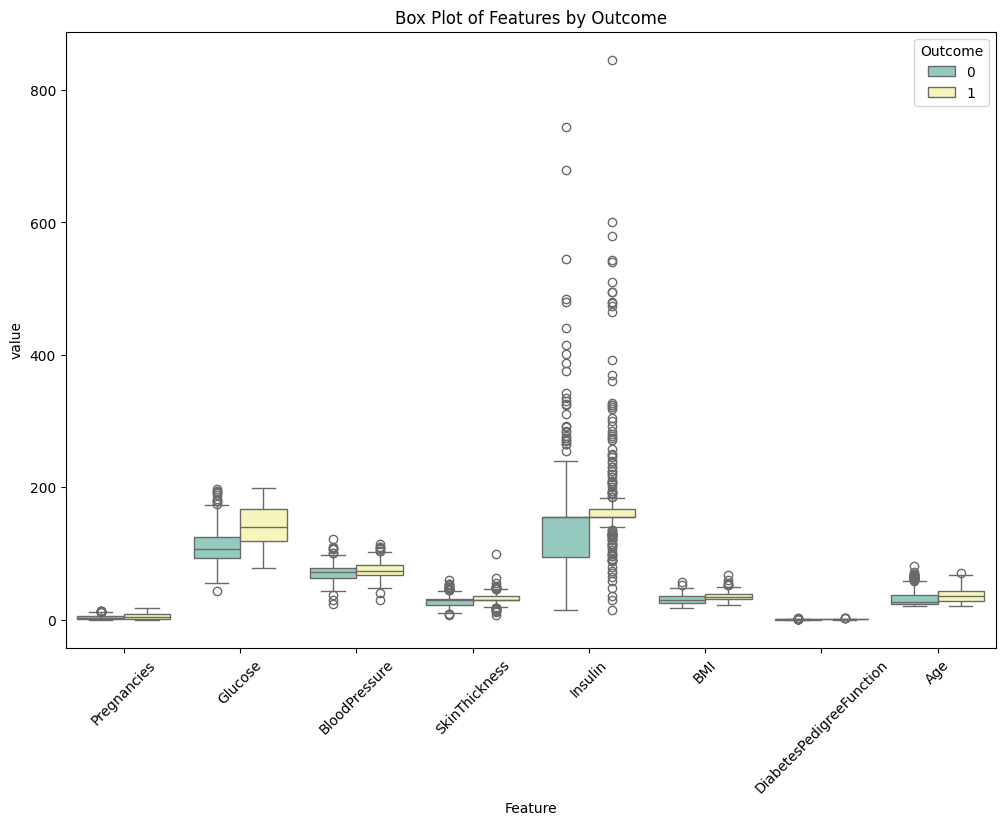

In [6]:
# Outlier

plt.figure(figsize=(12, 8))
df_melt = df.melt(id_vars='Outcome', var_name='Feature')
sns.boxplot(x='Feature', y='value', hue='Outcome', data=df_melt, palette='Set3')
plt.title('Box Plot of Features by Outcome')
plt.xticks(rotation=45)
plt.show()


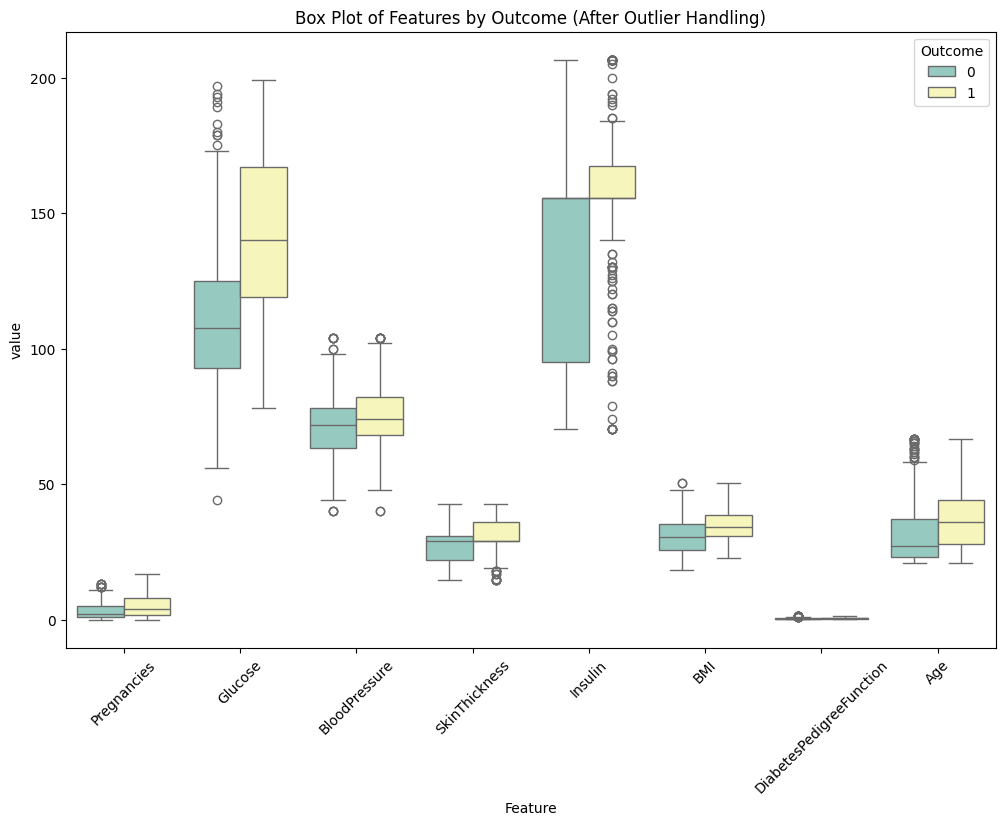

In [7]:
# trear outliers
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(12, 8))
df_melt = df.melt(id_vars='Outcome', var_name='Feature')
sns.boxplot(x='Feature', y='value', hue='Outcome', data=df_melt, palette='Set3')
plt.title('Box Plot of Features by Outcome (After Outlier Handling)')
plt.xticks(rotation=45)
plt.show()

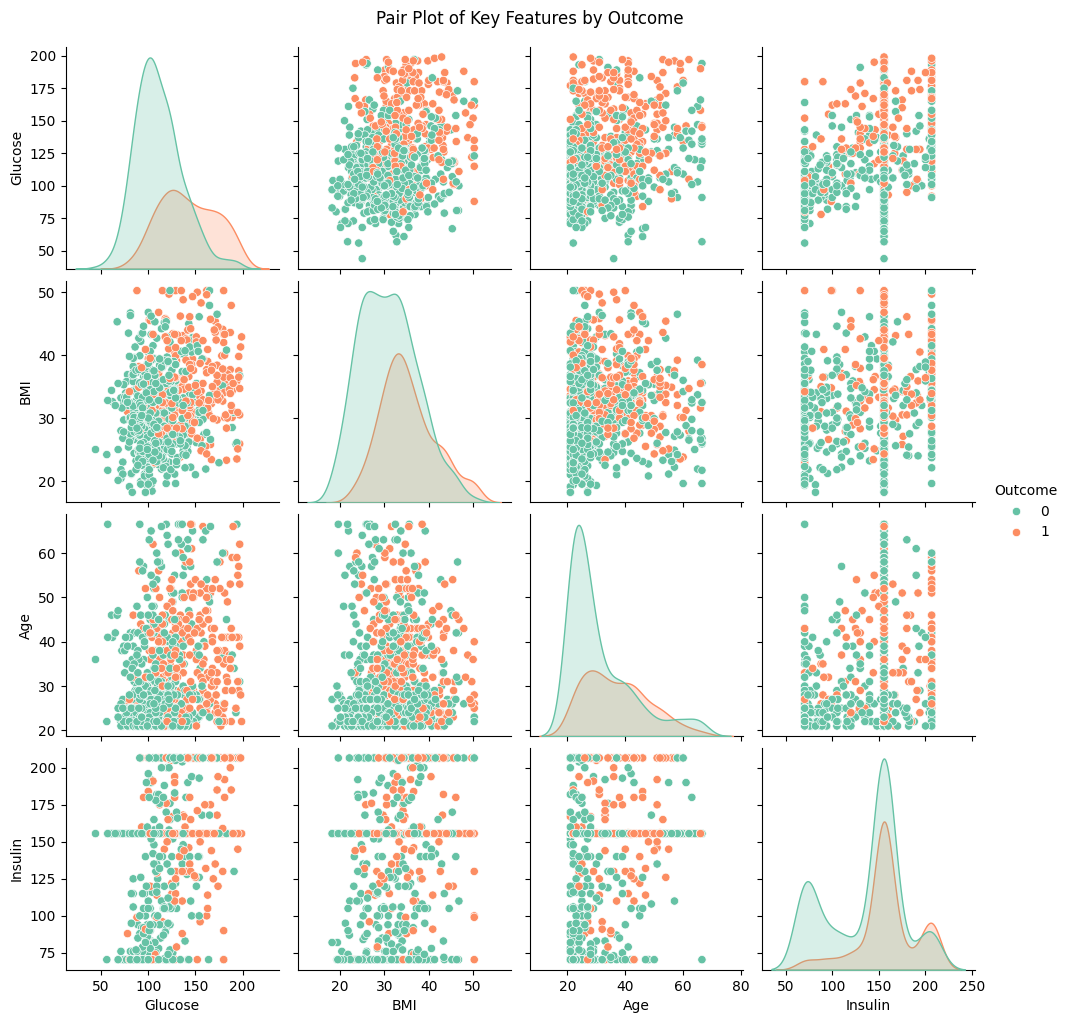

In [8]:
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin'], palette='Set2')
plt.suptitle('Pair Plot of Key Features by Outcome', y=1.02)
plt.show()

## 3. 🧹 Data Preparation

In [13]:
# Gantilah nilai 0 pada kolom medis tertentu dengan NaN (karena tidak mungkin 0 secara medis)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Imputasi nilai NaN dengan median
imputer = SimpleImputer(strategy='median')
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])

In [14]:
# Pisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 4. 📊 Exploratory Data Analysis (EDA)

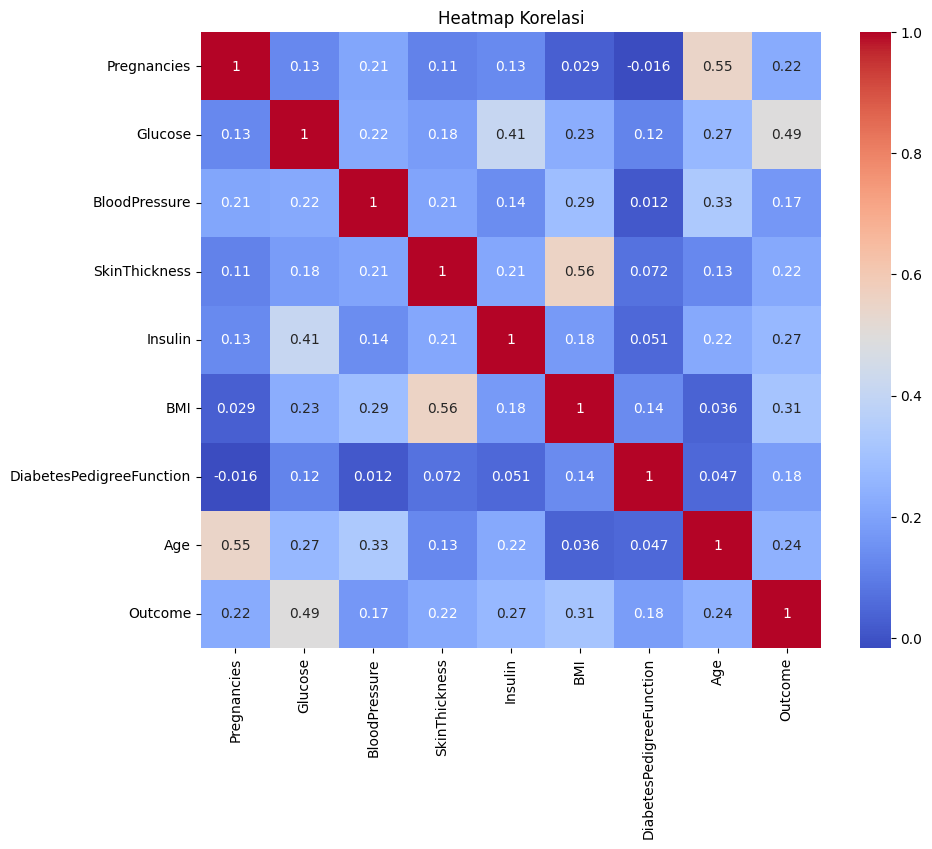

In [15]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

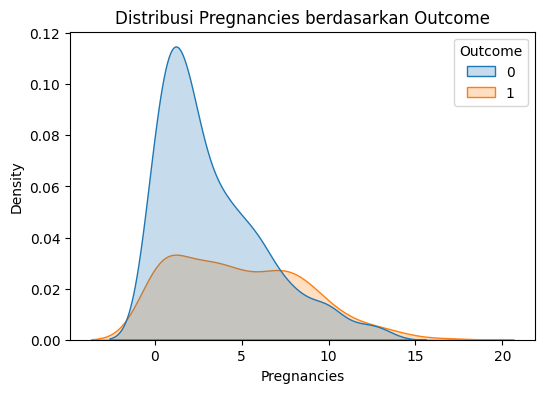

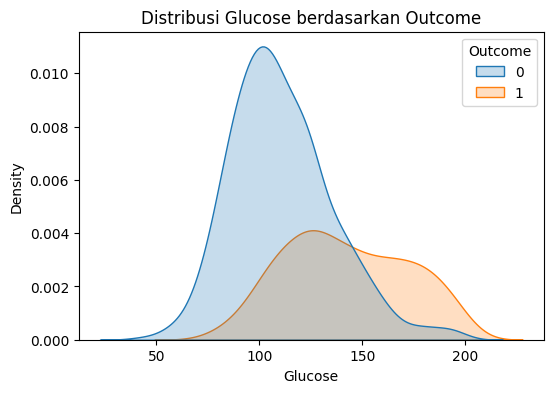

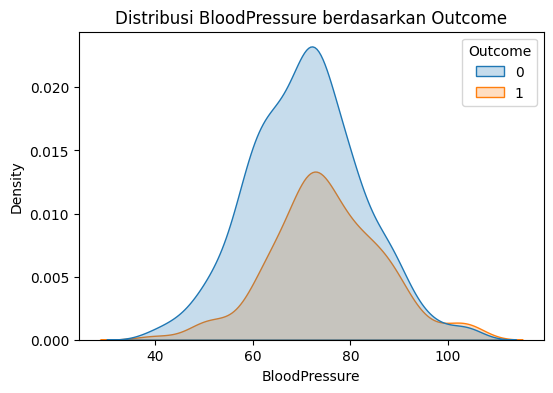

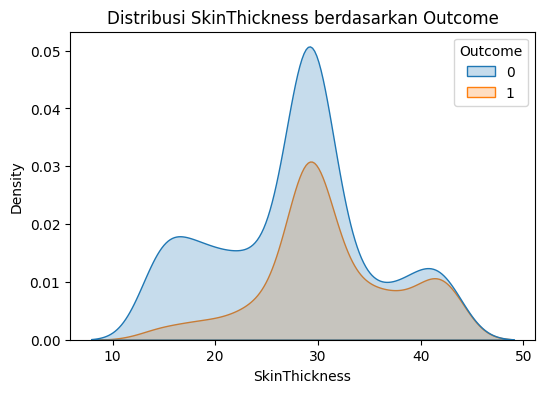

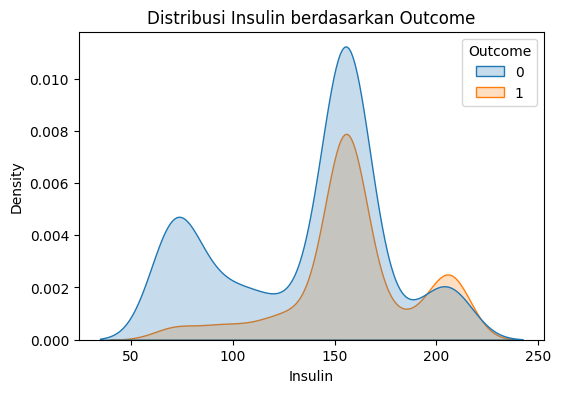

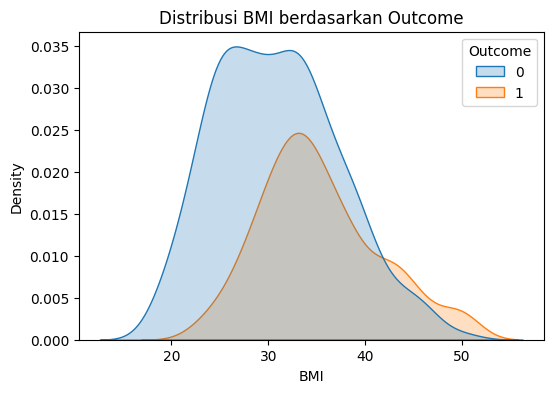

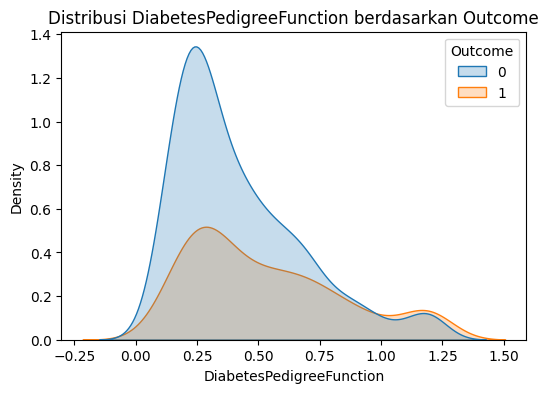

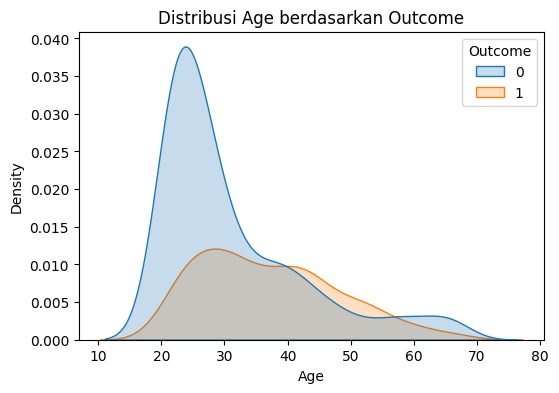

In [16]:
# Distribusi fitur penting berdasarkan kelas Outcome
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue='Outcome', fill=True)
    plt.title(f'Distribusi {col} berdasarkan Outcome')
    plt.show()

## 5. ⚙️ Modeling dan Evaluasi

In [17]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42,),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [18]:
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[name] = {'y_pred': y_pred, 'accuracy': accuracy, 'report': report}

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [19]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
for name in model_results:
    results['Model'].append(name)
    results['Accuracy'].append(model_results[name]['accuracy'])
    results['Precision'].append(model_results[name]['report']['1']['precision'])
    results['Recall'].append(model_results[name]['report']['1']['recall'])
    results['F1-Score'].append(model_results[name]['report']['1']['f1-score'])

print("\n(Accuracy):")
for name, result in model_results.items():
    accuracy = result['accuracy']
    print(f"{name}: Accuracy = {accuracy:.2f}")


(Accuracy):
Logistic Regression: Accuracy = 0.70
Random Forest: Accuracy = 0.75
Neural Network: Accuracy = 0.73
LightGBM: Accuracy = 0.75


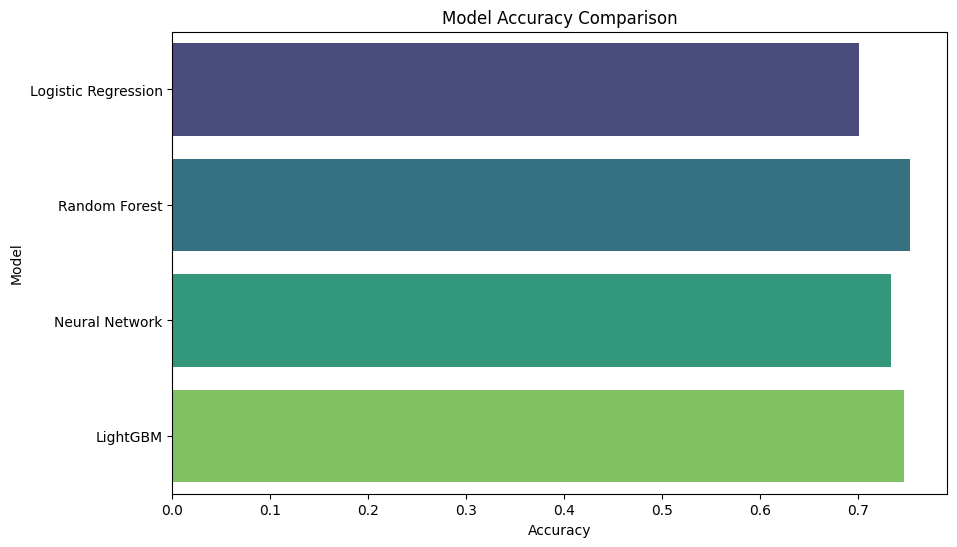

In [20]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df ,palette='viridis' )
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

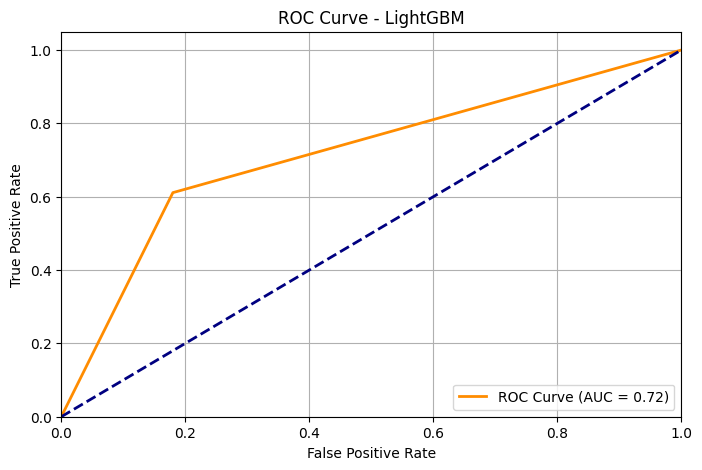

In [21]:
y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
if y_prob is not None:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [22]:
initial_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    initial_results[name] = {'y_pred': y_pred, 'accuracy': accuracy, 'report': report}

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [24]:
# Hyperparameter Tuning

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50, 50)],
        'alpha': [0.0001, 0.1]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [-1, 10, 20]
    }

}

best_models = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        best_models[name] = model

tuned_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    tuned_results[name] = {'y_pred': y_pred, 'accuracy': accuracy, 'report': report}




[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [37]:
# Buat ringkasan akurasi dan AUC untuk semua model
comparison = []
for name, result in tuned_results.items():
    y_pred = result['y_pred']
    y_proba = best_models[name].predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    comparison.append({'Model': name, 'Accuracy': acc, 'AUC': auc_score})

# Buat DataFrame dan tampilkan
comparison_df = pd.DataFrame(comparison).sort_values(by='AUC', ascending=False)
print("\n📊 Perbandingan Akurasi & AUC:")
print(comparison_df)



📊 Perbandingan Akurasi & AUC:
                 Model  Accuracy       AUC
3             LightGBM  0.766234  0.837407
0  Logistic Regression  0.701299  0.812407
2       Neural Network  0.733766  0.809630
1        Random Forest  0.753247  0.806759


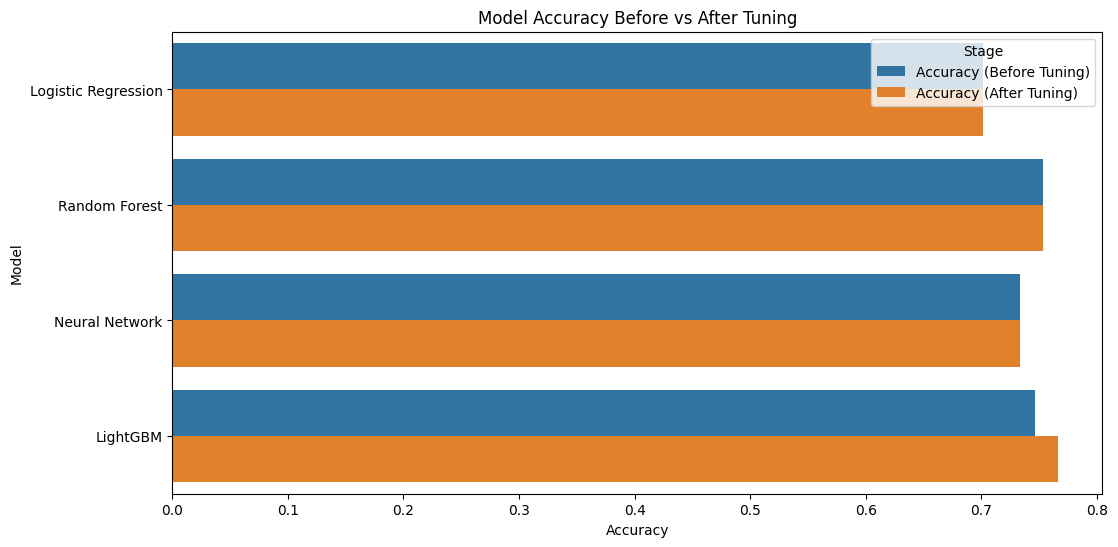

In [25]:
comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy (Before Tuning)': [initial_results[m]['accuracy'] for m in models.keys()],
    'Accuracy (After Tuning)': [tuned_results[m]['accuracy'] for m in models.keys()]
})
plt.figure(figsize=(12, 6))
comparison_df_melted = pd.melt(comparison_df, id_vars='Model', var_name='Stage', value_name='Accuracy')
sns.barplot(data=comparison_df_melted, x='Accuracy', y='Model', hue='Stage')
plt.title('Model Accuracy Before vs After Tuning')
plt.show()

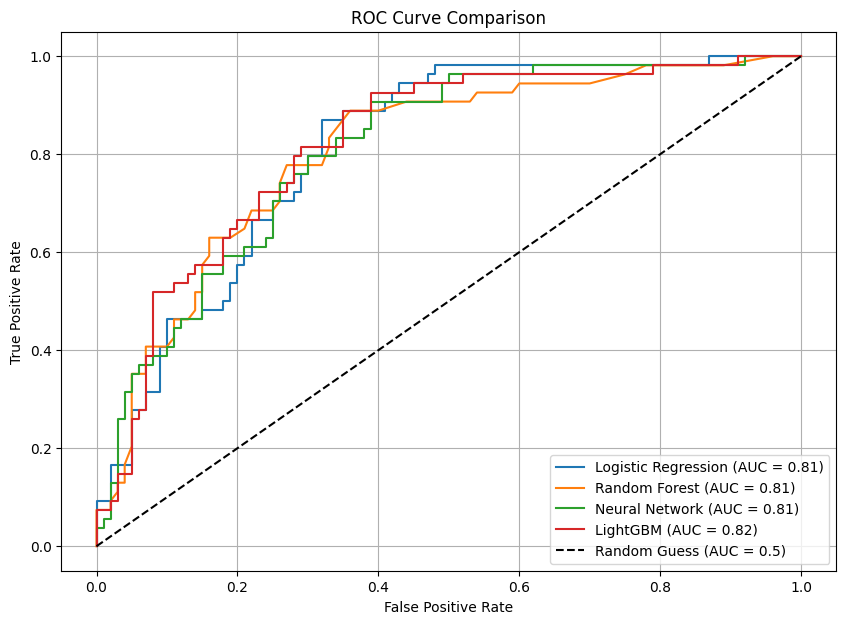

In [36]:
plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Pastikan model sudah dilatih
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Fallback untuk model tanpa predict_proba (jarang)
        y_proba = model.decision_function(X_test)

    # Hitung ROC dan AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

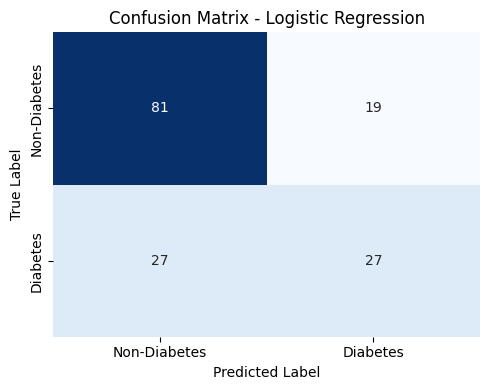

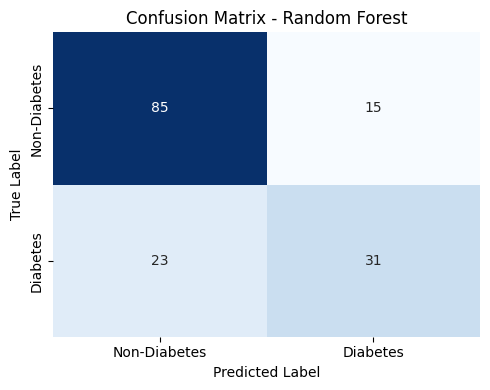

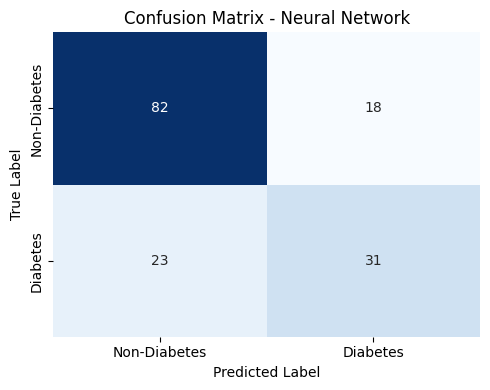

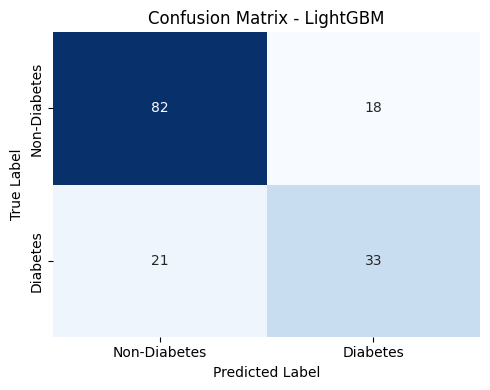

In [28]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Diabetes', 'Diabetes'],
                yticklabels=['Non-Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


## 6. 💡 Interpretasi dan Kesimpulan

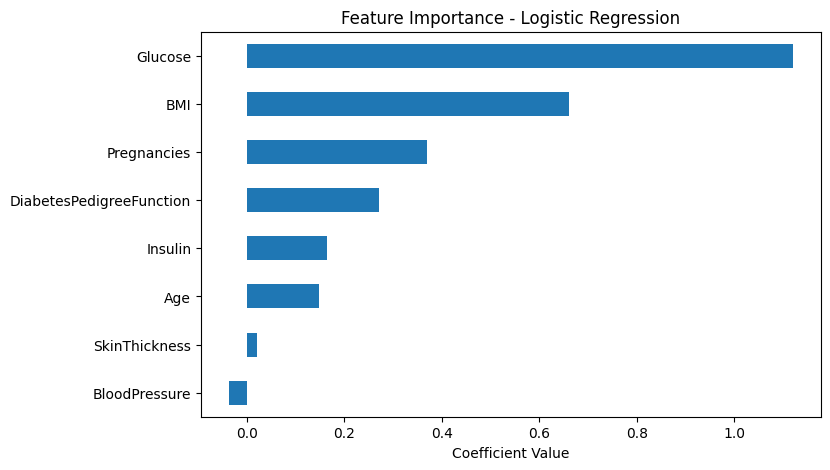

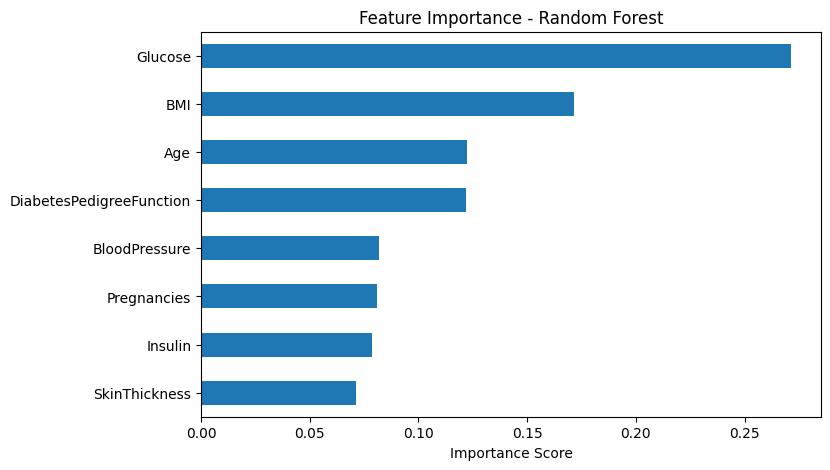

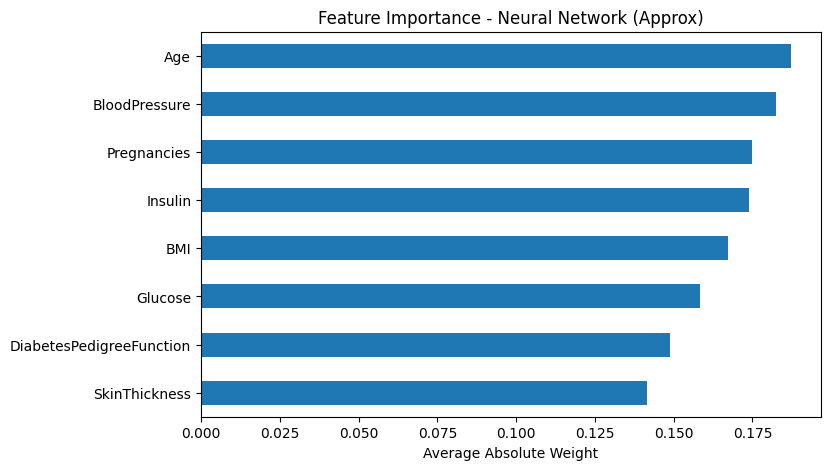

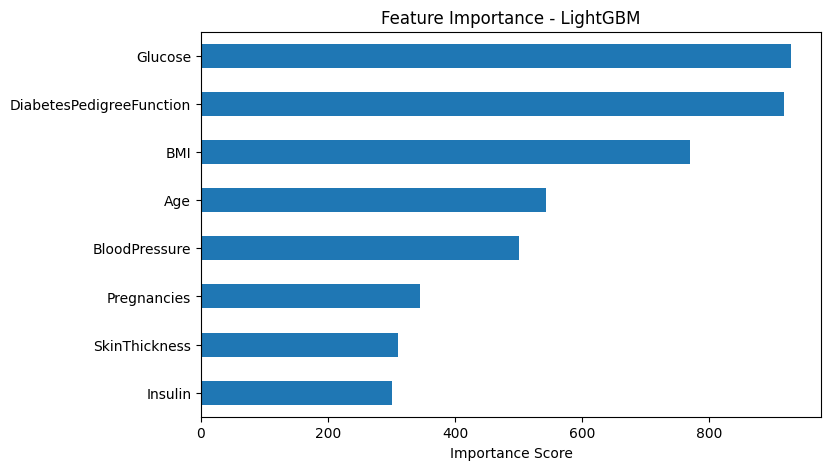

In [29]:

# Fitur penting dari Logistic Regression
log_reg = best_models['Logistic Regression']
coef = pd.Series(log_reg.coef_[0], index=X.columns)  # Ganti X_train.columns → X.columns
coef.sort_values().plot(kind='barh', title='Feature Importance - Logistic Regression', figsize=(8,5))
plt.xlabel('Coefficient Value')
plt.show()

# Fitur penting dari Random Forest
rf = best_models['Random Forest']
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp_rf.sort_values().plot(kind='barh', title='Feature Importance - Random Forest', figsize=(8,5))
plt.xlabel('Importance Score')
plt.show()

# Fitur penting dari Neural Network (approximate)
nn = best_models['Neural Network']
input_weights = nn.coefs_[0]
feat_imp_nn = pd.Series(np.mean(np.abs(input_weights), axis=1), index=X.columns)  # Ganti X_train.columns → X.columns
feat_imp_nn.sort_values().plot(kind='barh', title='Feature Importance - Neural Network (Approx)', figsize=(8,5))
plt.xlabel('Average Absolute Weight')
plt.show()

# Fitur penting dari LightGBM
lgbm = best_models['LightGBM']
feat_imp_lgbm = pd.Series(lgbm.feature_importances_, index=X.columns)
feat_imp_lgbm.sort_values().plot(kind='barh', title='Feature Importance - LightGBM', figsize=(8,5))
plt.xlabel('Importance Score')
plt.show()

Model terbaik setelah tuning adalah: LightGBM

--- Ringkasan Hasil Evaluasi Model Terbaik ---
Model Terpilih: LightGBM
Accuracy: 0.7662
Precision: 0.6957
Recall: 0.5926
F1-Score: 0.6400
ROC AUC: 0.8374

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



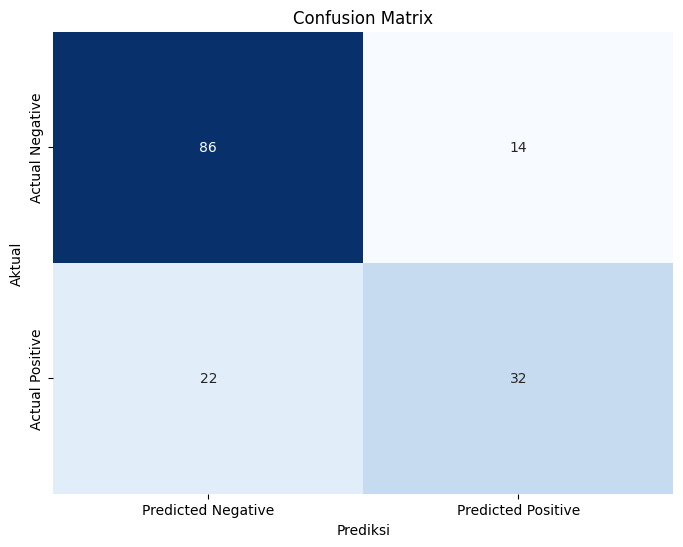

<Figure size 800x600 with 0 Axes>

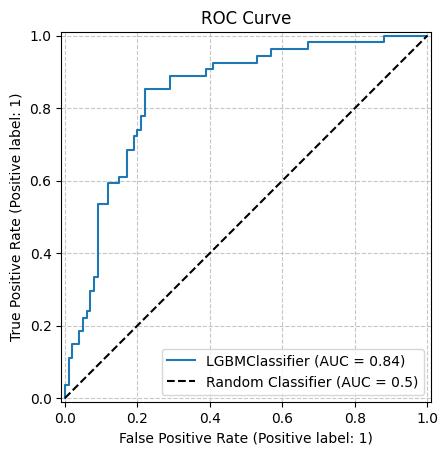

In [30]:
# Cari model terbaik berdasar akurasi setelah tuning
best_model_name = max(tuned_results, key=lambda k: tuned_results[k]['accuracy'])
best_model_for_eval = best_models[best_model_name]

print(f"Model terbaik setelah tuning adalah: {best_model_name}")

# Prediksi pada data uji
y_pred_final = best_model_for_eval.predict(X_test)

# Cek apakah model punya predict_proba
if hasattr(best_model_for_eval, "predict_proba"):
    y_proba_final = best_model_for_eval.predict_proba(X_test)[:, 1]
else:
    y_proba_final = None

# Hitung metrik evaluasi
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_proba_final) if y_proba_final is not None else None
final_conf_matrix = confusion_matrix(y_test, y_pred_final)

# Cetak ringkasan hasil
print("\n--- Ringkasan Hasil Evaluasi Model Terbaik ---")
print(f"Model Terpilih: {best_model_name}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
if final_roc_auc is not None:
    print(f"ROC AUC: {final_roc_auc:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_final))

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Visualisasi ROC Curve (jika tersedia)
if y_proba_final is not None:
    plt.figure(figsize=(8, 6))
    RocCurveDisplay.from_estimator(best_model_for_eval, X_test, y_test)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

### Kesimpulan:
- Model LightGBM memberikan hasil evaluasi terbaik secara umum.
- Fitur paling penting untuk prediksi adalah **Glucose**, **BMI**, dan **Age**.
- Model dapat digunakan untuk skrining awal risiko diabetes dengan akurasi yang cukup baik.